------------------------------------------------------------------------
###### **Team**:


*   Juan Balanazar Vega
*   Isabel Cámara Montalvo
*   Osiris Cámara Salinas
*   Víctor Uribe Hernandez
------------------------------------------------------------------------





## **Rigth chart**
-----------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#### **Comparasion.**

##### Among items: Variable width column chart

In [ ]:
suicides = pd.read_csv('Suicides in India 2001-2012.csv')

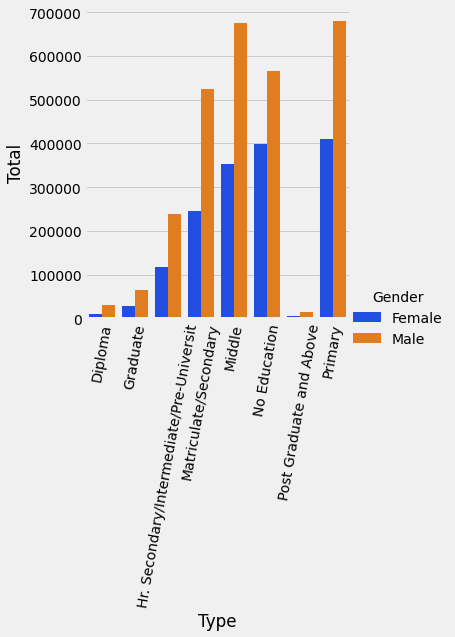

In [ ]:
### education status of people who committed suicides
filter_social_status = pd.DataFrame(suicides[suicides["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", palette= 'bright', data=filter_social_status);
g.set_xticklabels(rotation=80)

##### Among items: Bar chart many items




In [ ]:
murder = pd.read_csv('Murder_victim_age_sex.csv')

In [ ]:
murder.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0


In [ ]:
murder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area_Name               1018 non-null   object 
 1   Year                    1018 non-null   int64  
 2   Group_Name              1018 non-null   object 
 3   Sub_Group_Name          1018 non-null   object 
 4   Victims_Above_50_Yrs    962 non-null    float64
 5   Victims_Total           1018 non-null   int64  
 6   Victims_Upto_10_15_Yrs  876 non-null    float64
 7   Victims_Upto_10_Yrs     900 non-null    float64
 8   Victims_Upto_15_18_Yrs  888 non-null    float64
 9   Victims_Upto_18_30_Yrs  1009 non-null   float64
 10  Victims_Upto_30_50_Yrs  1007 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 87.6+ KB


Text(0.5, 1.0, 'Gender Distribution of Victims per State')

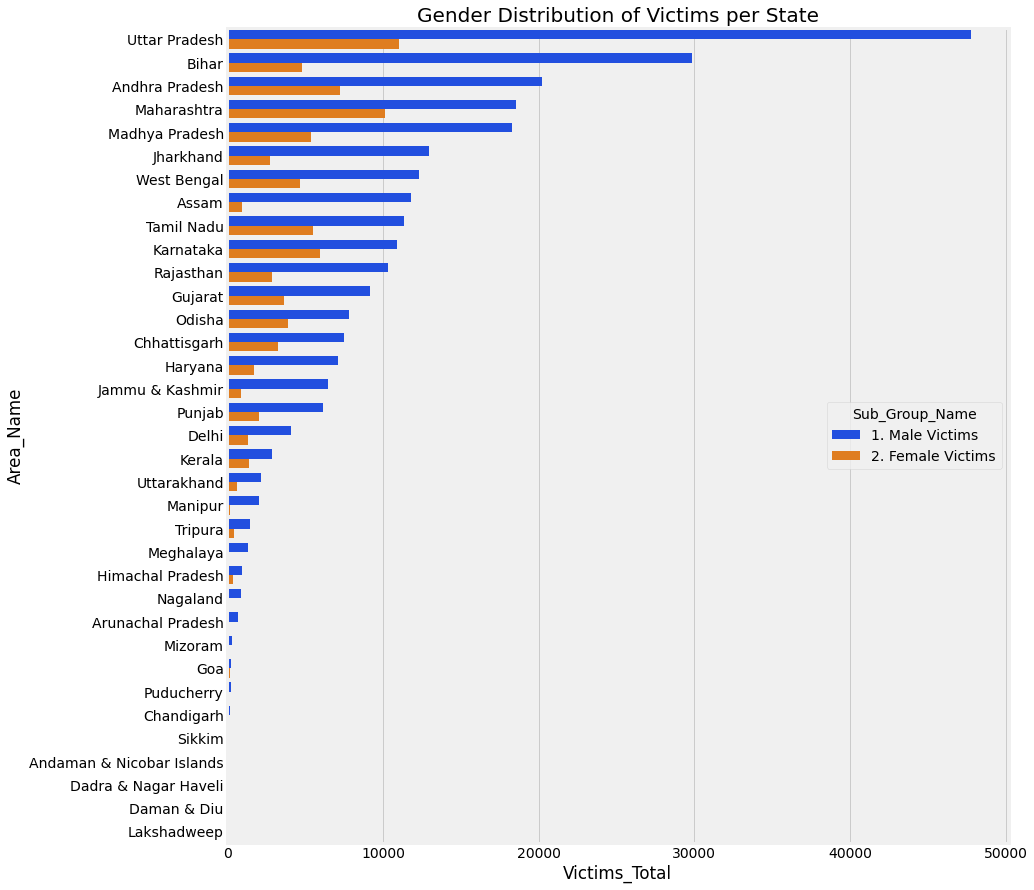

In [ ]:
murdergs = murder.groupby(['Area_Name' , 'Sub_Group_Name'])['Victims_Total'].sum().sort_values(ascending = False).reset_index() #groupby state and gender
murdergs = murdergs[murdergs['Sub_Group_Name']!= '3. Total'] #we dont need total category of gender
plt.figure(figsize = (14,15))
plt.style.use("fivethirtyeight")
sns.barplot( x = 'Victims_Total', y = 'Area_Name' , hue = 'Sub_Group_Name' , data = murdergs,palette= 'bright') #barplot
plt.title('Gender Distribution of Victims per State',size = 20)

##### Among items: Column chart few items

In [ ]:
victims = pd.read_csv('20_Victims_of_rape.csv') 
victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [ ]:
mean = victims.Victims_of_Rape_Total.mean() ##the mean of the total of all the victims
print(mean)

362.1980952380952


In [ ]:
Total = victims[victims.Victims_of_Rape_Total>362.19] ##comparing and using just the areas that have more than the mean

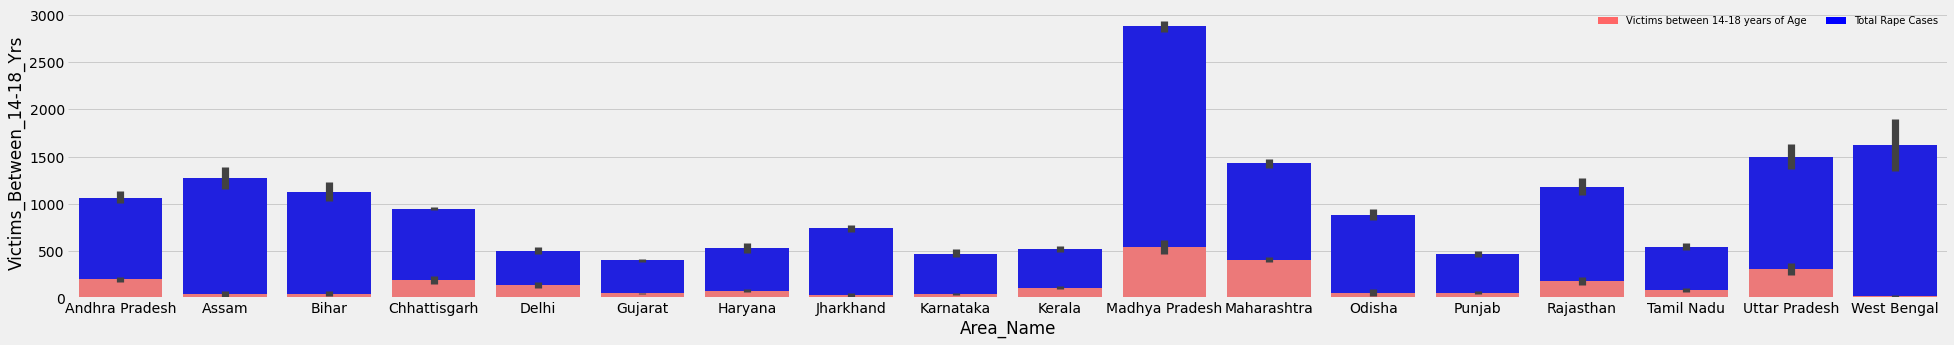

In [ ]:
Frame_Analisis= Total.copy()
plt.figure(figsize=(30,5))
sns.barplot(x = Frame_Analisis.Area_Name, y = Frame_Analisis['Rape_Cases_Reported'], color = "blue")
upto_18 = sns.barplot(x = Frame_Analisis.Area_Name, y = Frame_Analisis['Victims_Between_14-18_Yrs'], color = "#ff6666")
top = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
Years_18 = plt.Rectangle((0,0),1,1,fc='#ff6666',  edgecolor = 'none')
l = plt.legend([Years_18, top], ['Victims between 14-18 years of Age', 'Total Rape Cases'], loc=1, ncol = 2, prop={'size':10}) 
l.draw_frame(False)
sns.despine(left=True)

##### Among items: Table with embedded charts

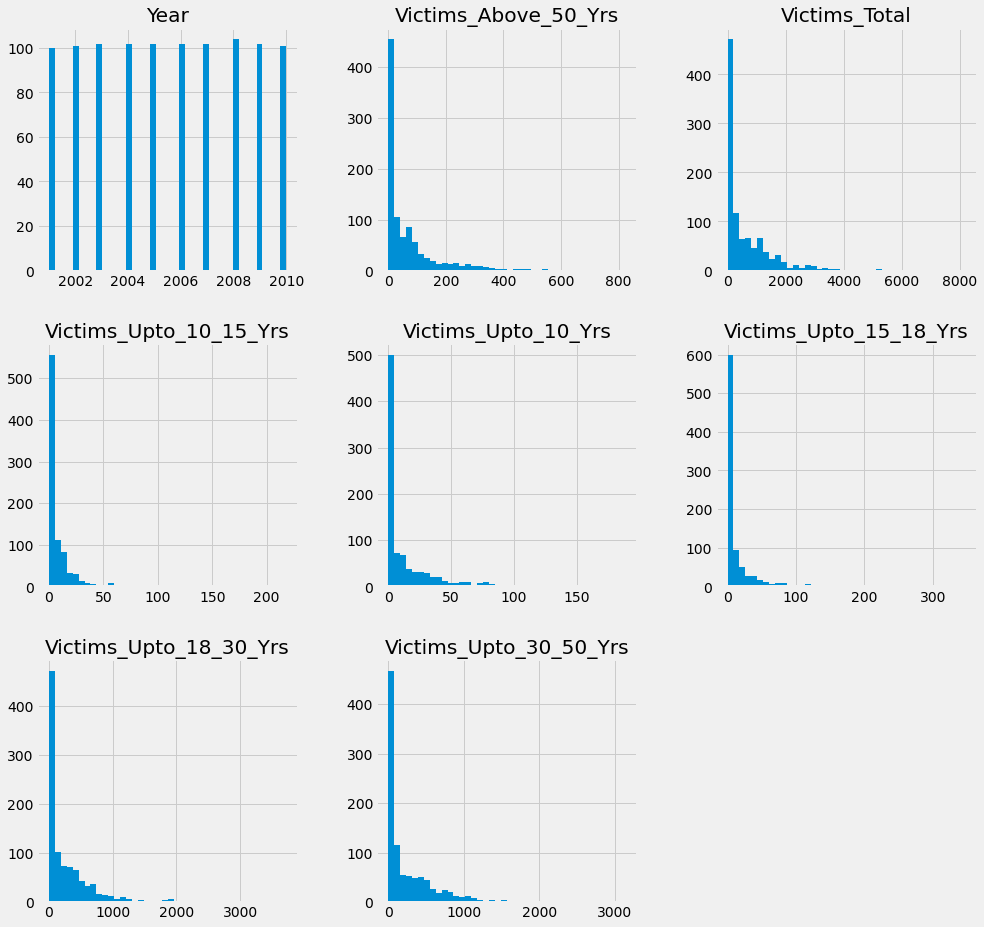

In [ ]:
murder.hist(bins=40 , figsize=(15,15)) #Pandas Hist function
plt.show()

In [ ]:
##Part 2

In [ ]:
ramen = pd.read_csv('ramen-ratings.csv')
est = pd.read_csv('estudiantes.csv', sep=';')

**Line Chart**

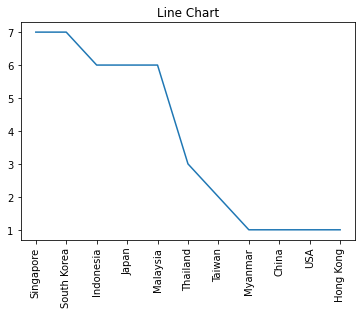

In [ ]:
ramen_clean = ramen.dropna(axis=0)
country = ramen_clean['Country'].value_counts()
plt.plot(country)
plt.title('Line Chart')
plt.xticks(rotation=90)
plt.show();

**Multiple Line Chart**

Singapore      7
South Korea    7
Indonesia      6
Japan          6
Malaysia       6
Thailand       3
Taiwan         2
Myanmar        1
China          1
USA            1
Hong Kong      1
Name: Country, dtype: int64
Pack    35
Tray     4
Bowl     1
Cup      1
Name: Style, dtype: int64
5       34
4.25     2
4.5      2
3.75     1
4        1
4.75     1
Name: Stars, dtype: int64


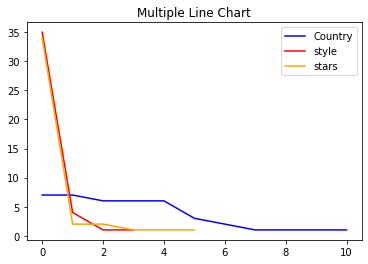

In [ ]:
style = ramen_clean['Style'].value_counts()
stars = ramen_clean['Stars'].value_counts()
x = range(0,6)
x1 = range(0,11)
x2 = range(0,4)
plt.title('Multiple Line Chart')
plt.plot(x1, country, color='blue', label='Country')
plt.plot(x2, style, color='red', label='style')
plt.plot(x, stars, color='orange', label='stars')
plt.legend();
print(country)
print(style)
print(stars)

**Circular Area Graph**

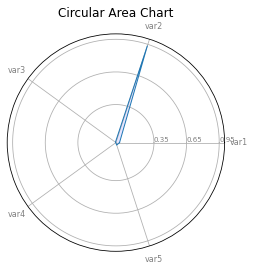

In [ ]:
est = pd.read_csv('estudiantes.csv', sep=';')
from math import pi
df = pd.DataFrame({
'group': est['Institucion'],
'var1': est['Blanca'],
'var2': est['AfroAmeri'],
'var3': est['Hispano'],
'var4': est['Asia'],
'var5': est['Otras']
})
 
categories=list(df)[1:]
N = len(categories)

values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], categories, color='grey', size=8)

ax.set_rlabel_position(0)
plt.yticks([0.35,0.65,0.95], ["0.35","0.65","0.95"], color="grey", size=7)
plt.ylim(0,1)
plt.title('Circular Area Chart')
ax.plot(angles, values, linewidth=1, linestyle='solid')

ax.fill(angles, values, 'b', alpha=0.1);

**Multibar Chart**

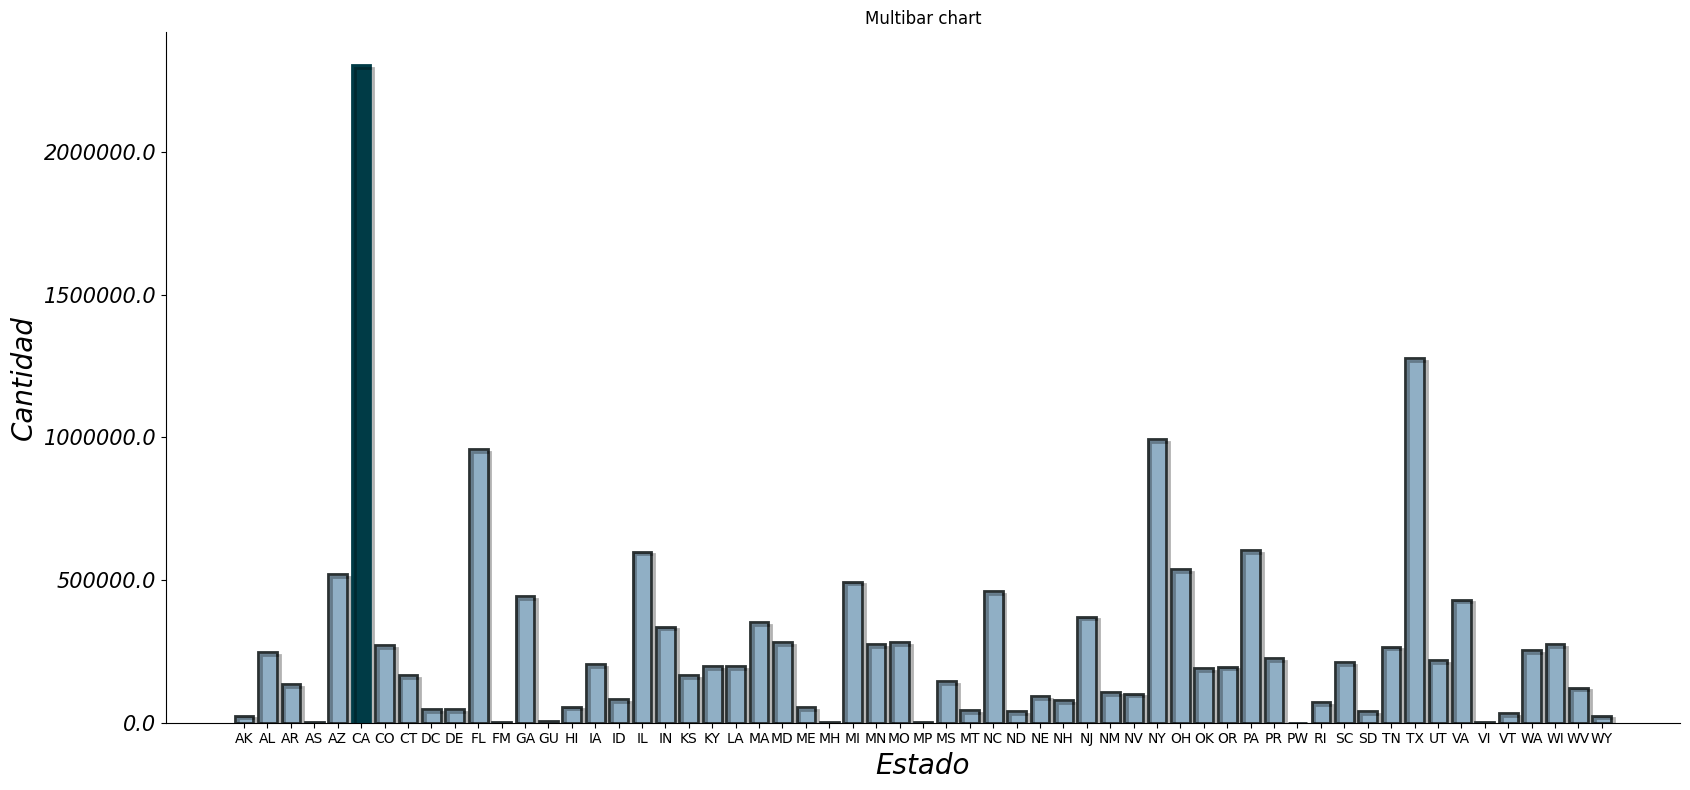

In [ ]:
est_res = est.pivot_table(index = ['Estado'], values = ['Estudiantes'], aggfunc = np.sum)
import matplotlib.patheffects as pa
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

fig, ax = plt.subplots(figsize = (17,8))

barplot = ax.bar(range(len(est_res)), est_res.Estudiantes, width = 0.8, align = 'center', tick_label=est_res.index,
      color = '#90AFC5', edgecolor = '#2A3132', linewidth = 2, path_effects = [pa.Normal(),pa.SimpleLineShadow()] )

ax.spines['top'].set_alpha(0.0)
ax.spines['right'].set_alpha(0.0)

ax.set_yticklabels(ax.get_yticks(), fontsize = 15, fontstyle = 'italic')

ax.set_title('Multibar chart')
ax.set_ylabel('Cantidad', fontsize = 20, fontstyle = 'italic')
ax.set_xlabel('Estado', fontsize = 20, fontstyle = 'italic')

barplot[est_res.reset_index()['Estudiantes'].idxmax()].set_color('#003B46')

fig.tight_layout()
plt.show()

## **Distribution**

In [ ]:
#Part 3

In [ ]:
IMDb = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')['IMDb']
IMDb.head()

0    8.8
1    8.7
2    8.5
3    8.5
4    8.8
Name: IMDb, dtype: float64

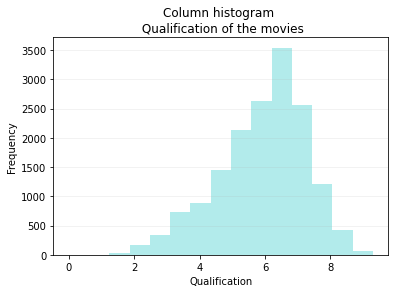

In [ ]:
IMDb.plot(kind='hist', bins=15, histtype ='stepfilled', color='c', alpha =.3)
plt.title('Column histogram \n Qualification of the movies')
plt.xlabel('Qualification')
plt.ylabel('Frequency')
plt.grid(axis ='y', alpha = 0.2)

In [ ]:
movies = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
runtime=movies['Runtime']
year = movies['Year']
netflix = movies['Netflix']
rt=movies['Rotten Tomatoes'].str.replace('%','').str.replace('NaN','').astype(float)
age=movies['Age'].str.replace('+','').str.replace('NaN','').str.replace('all','0').astype(float)

(0.0, 100.0)

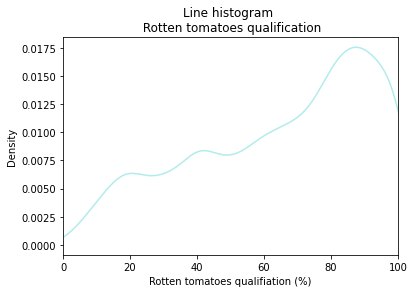

In [ ]:
rt.plot(kind='kde', color='c', alpha =.3)
plt.title('Line histogram \n Rotten tomatoes qualification')
plt.xlabel('Rotten tomatoes qualifiation (%)')
plt.ylabel('Density')
plt.xlim(0,100)

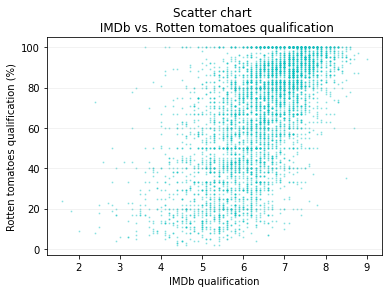

In [ ]:
plt.scatter(IMDb, rt, s=1, c='c', alpha=.3)
plt.title('Scatter chart \n IMDb vs. Rotten tomatoes qualification')
plt.xlabel('IMDb qualification')
plt.ylabel('Rotten tomatoes qualification (%)')
plt.grid(axis ='y', alpha = 0.2)

In [ ]:
from mpl_toolkits import mplot3d

Text(0.5, 0, 'Average')

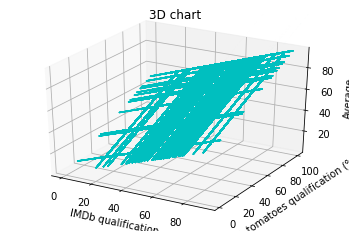

In [ ]:
fig=plt.figure()
ax=plt.axes(projection='3d')

def z_function(x,y):
  return ((x + y)/2)

x=IMDb*10
y=rt

X, Y = np.meshgrid(x,y)
Z=z_function(X,Y)

ax.plot_wireframe(X,Y,Z, color='c')
ax.set_title('3D chart')
ax.set_xlabel('IMDb qualification')
ax.set_ylabel('Rotten tomatoes qualification (%)')
ax.set_zlabel('Average')